In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('titanic.csv')

 #숫자로 코딩된 범주형 변수는 변환: astype()
df["Survived"]=df["Survived"].astype(str)
df["Pclass"]=df["Pclass"].astype(str)
df.info()
df.head()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,0,3,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,549,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [39]:
#PClass 변수 분석

#gruopby(), size()를 이용해 Pclass 빈도수 구하기
grouped = df.groupby("Pclass")
grouped.size()

Pclass
1    216
2    184
3    491
dtype: int64

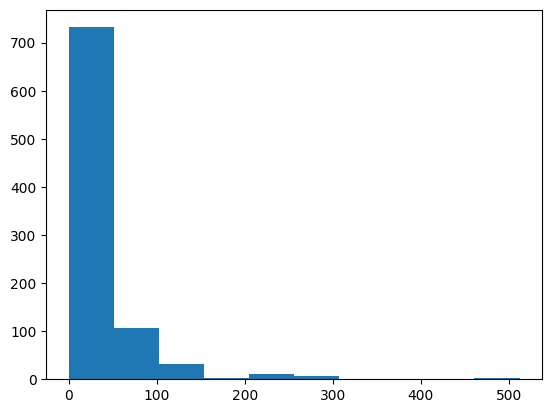

In [40]:
#Fare 변수 분석

#hist
plt.hist(df["Fare"])
plt.show()

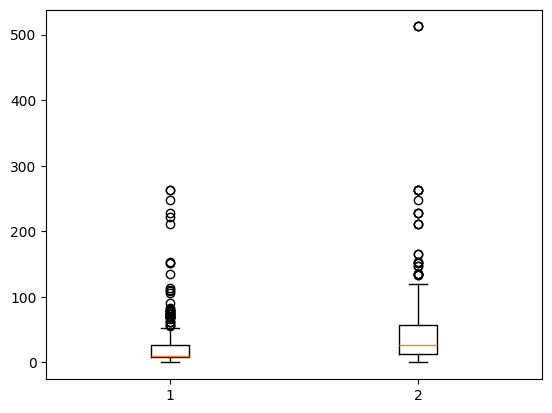

In [41]:
# 데이터 분리
data_0 = df[df["Survived"]=="0"]["Fare"]
data_1 = df[df["Survived"]=="1"]["Fare"]

#Boxplot - Survived 값에 따른 Fare 값의 분포
fig, ax = plt.subplots()
ax.boxplot([data_0,data_1])
plt.show()

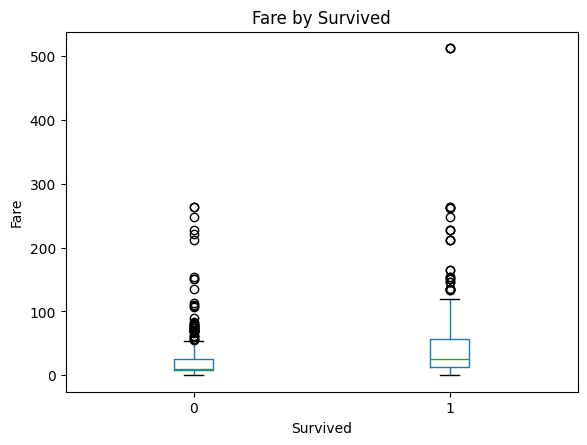

In [50]:
#다른 방법

df.boxplot(column='Fare', by='Survived', grid=False)
plt.title('Fare by Survived')
plt.suptitle('')  # 제목 위의 자동 생성된 제목 제거
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

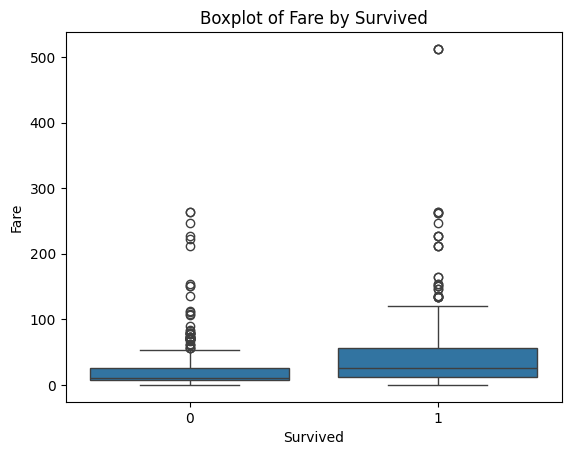

In [45]:
#Seaborn을 이용한 방법
import seaborn as sns
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.title('Fare by Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

In [51]:
#Sex 변수 분석
#빈도수 계산
grouped = df.groupby("Sex")
print(grouped.size())

Sex
female    314
male      577
dtype: int64


In [9]:
#성별 생존자 수
data_0 = df[df["Sex"]=="female"]["Survived"]
grouped = pd.DataFrame(data_0).groupby("Survived")
print(grouped.size())

data_1 = df[df["Sex"]=="male"]["Survived"]
grouped = pd.DataFrame(data_1).groupby("Survived")
print(grouped.size())

Survived
0     81
1    233
dtype: int64
Survived
0    468
1    109
dtype: int64


In [10]:
#crosstab
pd.crosstab(df['Sex'], df['Survived'], margins=True) 

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891
